<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [130]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [131]:
# Initialize data dict:
sat_scores_dict = {
    "State": [],
    "Rate": [],
    "Verbal": [],
    "Math": []
}

# Use csv.DictReader(csvfile) method to map info in CSV to DictReader object:
# Sample row in DictReader -- {'Math': '510', 'State': 'CT', 'Rate': '82', 'Verbal': '509'}
for each_row in csv.DictReader(open("sat_scores.csv")):
    for variable in sat_scores_dict.keys():
        try:
            sat_scores_dict[variable].append(int(each_row[variable]))
        except:
            sat_scores_dict[variable].append(each_row[variable])

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [132]:
# Make a pandas DataFrame object with the SAT dictionary:
sat_dict_df = pd.DataFrame(sat_scores_dict)

# Show dtypes of df from dict:
print(sat_dict_df.dtypes)

# Make a pandas DataFrame object with the pandas .read_csv():
sat_df = pd.read_csv("sat_scores.csv")

# Show dtypes of df from reading csv directly:
print(sat_df.dtypes)

# A: 
# The data types of the values in the DataFrames are the same, but only because I converted the numeric string values (the values in "Math", "Rate" and "Verbal") to integers when I created the SAT dictionary above.
# The order of the columns are different though, as the keys in dictionary were rearranged.

Math       int64
Rate       int64
State     object
Verbal     int64
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [133]:
sat_df.head()

sat_df.tail()

# Our data most likely describes the following --
# State: The U.S. states where the students reside
# Rate: The participation rates (the percentage of students from the states who sat for the SAT)
# Verbal: The mean SAT Verbal scores of students from the states who sat for the SAT 
# Math: The mean SAT Math scores of students from the states who sat for the SAT

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [134]:
data_dict = {
    "State": {},
    "Rate": {},
    "Verbal": {},
    "Math": {}
}

column_descriptions = {
    "State": "U.S. states where the SAT-taking students reside",
    "Rate": "SAT participation rates of state (%)",
    "Verbal": "Mean SAT Verbal scores of state",
    "Math": "Mean SAT Math scores of state"
}

for variable in data_dict.keys():
    data_dict[variable]["description"] = column_descriptions[variable]
    data_dict[variable]["type"] = sat_df[variable].dtype
    data_dict[variable]["rows"] = sat_df[variable].shape[0]

pd.DataFrame(data_dict).transpose()

,description,rows,type
Math,Mean SAT Math scores of state,52,int64
Rate,SAT participation rates of state (%),52,int64
State,U.S. states where the SAT-taking students reside,52,object
Verbal,Mean SAT Verbal scores of state,52,int64


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

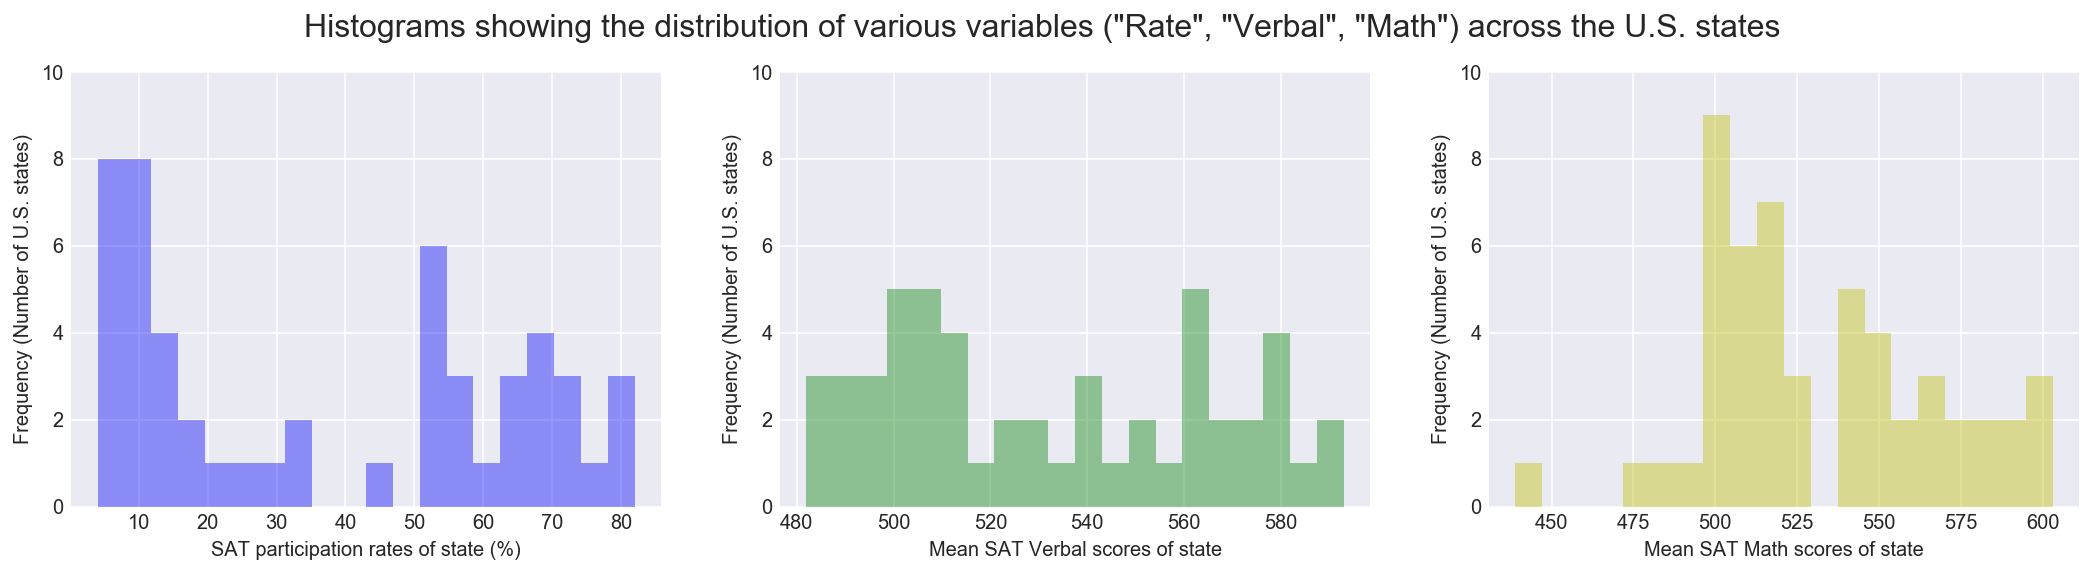

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

distplot_colors = ["b", "g", "y"]

def plot_hist(column_index):
    column_name = sat_df.columns[column_index]
    sns.set_style("darkgrid")
    sns.distplot(sat_df[column_name], kde=False, bins=20, axlabel=data_dict[column_name]["description"], color=distplot_colors[column_index - 1])

fig = plt.figure(figsize=(18, 4))

for sp in range(3):
    sp_ax = fig.add_subplot(1, 3, sp + 1)
    plot_hist(sp + 1)
    plt.ylim(ymax=10) # Since plots are side-by-side, clearer if they share same y-axis scale 
    plt.ylabel("Frequency (Number of U.S. states)")

plt.suptitle("Histograms showing the distribution of various variables (\"Rate\", \"Verbal\", \"Math\") across the U.S. states", fontsize=16)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

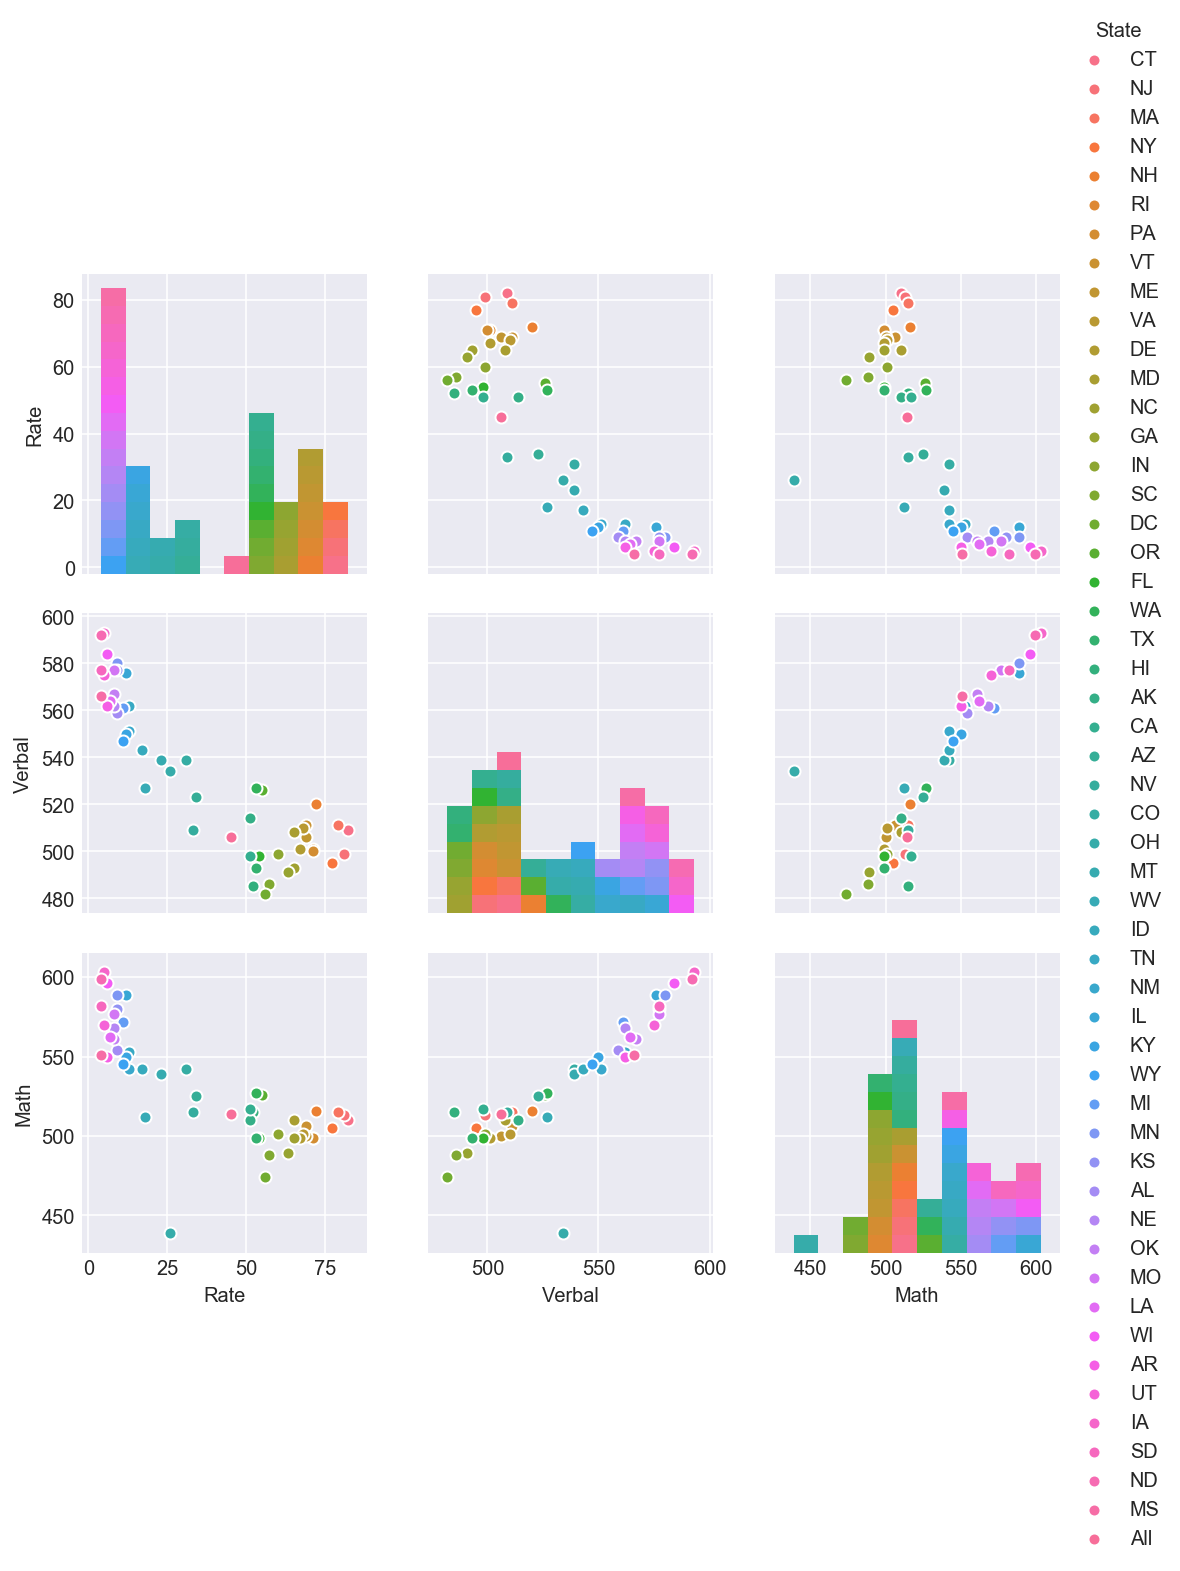

In [136]:
sns.pairplot(sat_df, hue="State")

# Preliminary observations that bear further investigation:
# - "Rate" and "Verbal" appear to be negatively correlated -- The higher the SAT participation rate, the lower the mean SAT Verbal score.
# - "Rate" and "Math" appear to be negatively correlated as well.
# - "Verbal" and "Math" appear to be positively correlated -- The higher the mean SAT Verbal score, the higher the mean SAT Math score.
# - There seems to be an outlying value in the "Math" column -- One state has a particularly low mean SAT Math score.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

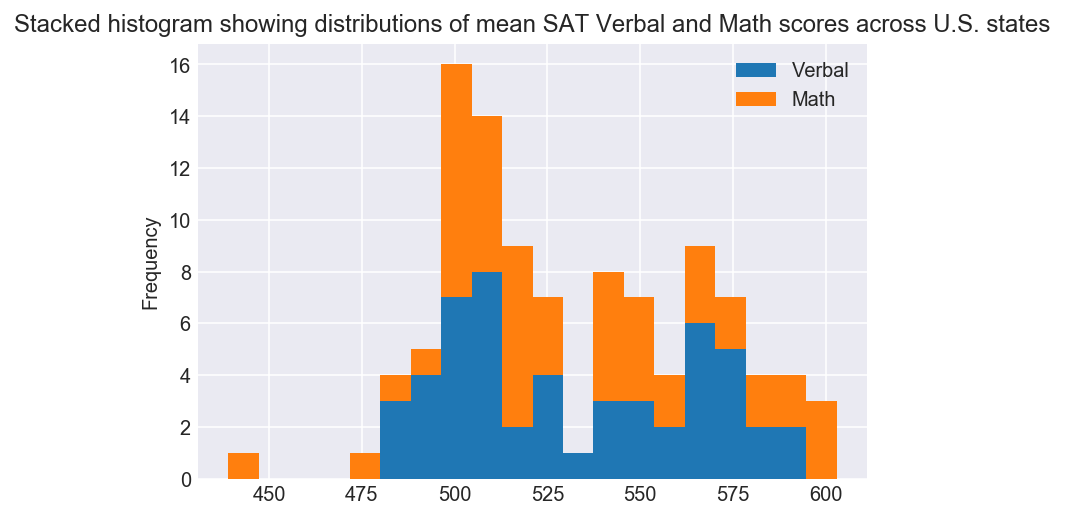

In [141]:
sat_df[["Verbal", "Math"]].plot.hist(stacked=True, bins=20)
plt.title("Stacked histogram showing distributions of mean SAT Verbal and Math scores across U.S. states")
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

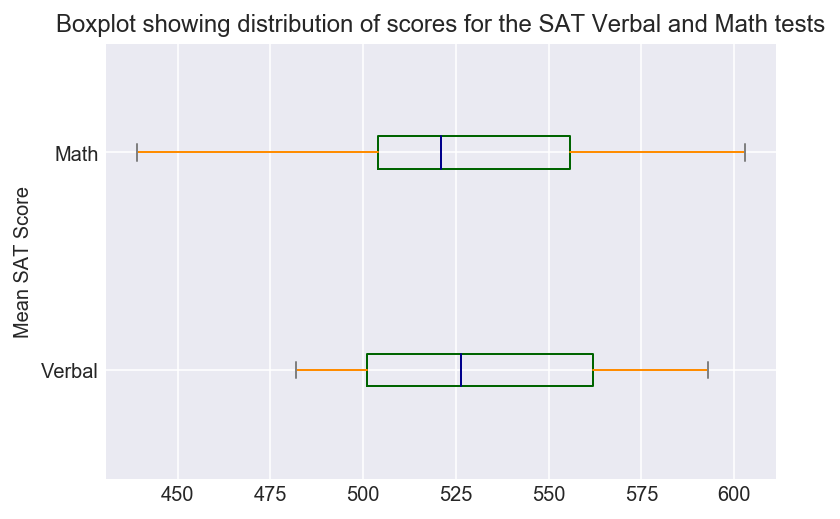

In [142]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
sat_df[["Verbal", "Math"]].plot.box(color=color, sym='r', vert=False) # Prefer using sns -- it's prettier
plt.ylabel("Mean SAT Score")
plt.title("Boxplot showing distribution of scores for the SAT Verbal and Math tests")
plt.show()

# Benefits of boxplots:
# - Summarizes data using five key concepts (median, upper quartile, lower quartile, min and max) -- Allowing quick comparisons.
# - Clearly shows outliers (1.5 times the inter-quartile range).
# - (vs scatterplot) Provides indications of symmetry within the data

# We shouldn't plot "Rate" on the same chart as it has a different y-axis (percentage instead of mean SAT score).

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


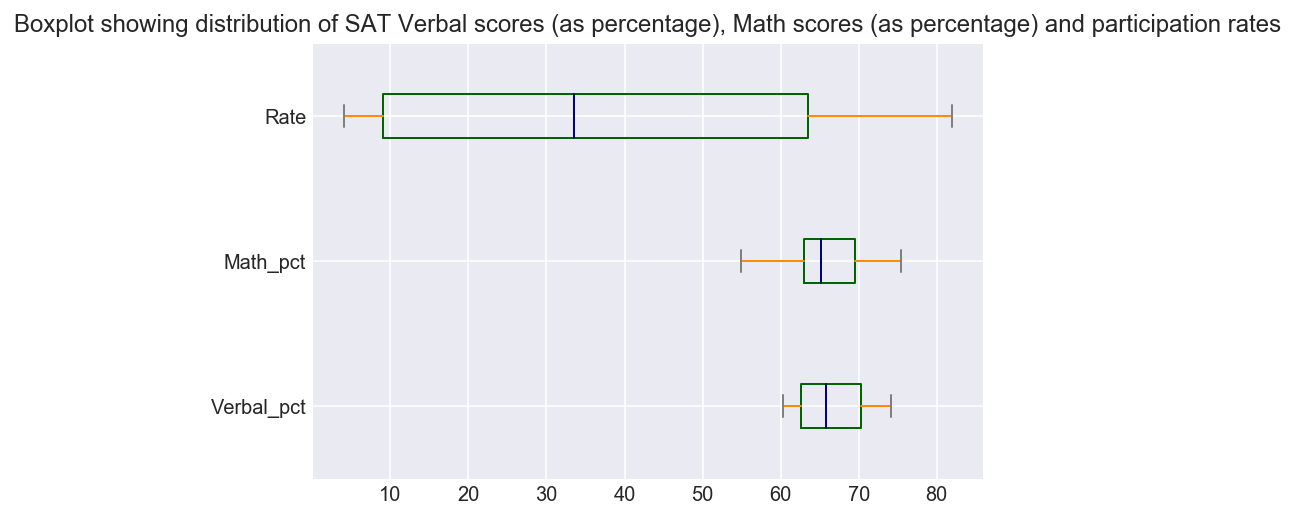

In [160]:
# Possible Change #1: Express the mean SAT score as a percentage of the highest total SAT score possible.
# This makes the y-values of all three variables a percentage, and so they can share a y-axis.
sat_df["Verbal_pct"] = (sat_df["Verbal"] / float(800)) * 100
sat_df["Math_pct"] = (sat_df["Math"] / float(800)) * 100

sat_df[["Verbal_pct", "Math_pct", "Rate"]].plot.box(color=color, sym='r', vert=False)
plt.title("Boxplot showing distribution of SAT Verbal scores (as percentage), Math scores (as percentage) and participation rates")
plt.show()

In [168]:
# Reload CSV such that the df does not have the new columns (didn't want to use .drop())
sat_df = pd.read_csv("sat_scores.csv")

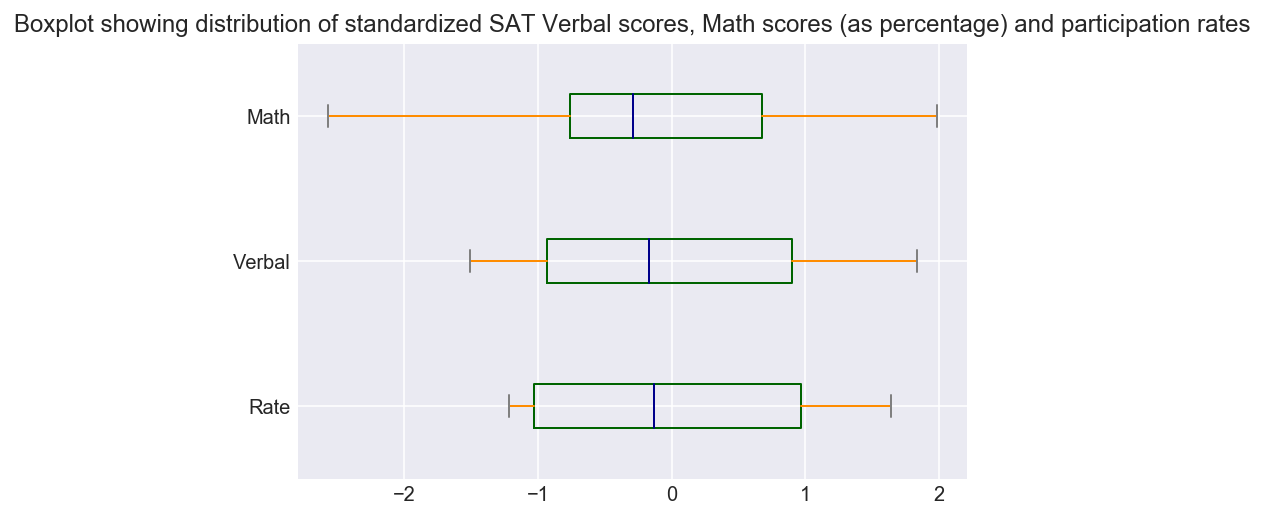

In [144]:
# Possible Change #2: Standardize the variables.
# This allows us to visualize and compare the distribution of data for the various variables.
std_sat_df = (sat_df[["Rate", "Verbal", "Math"]] - sat_df[["Rate", "Verbal", "Math"]].mean()) / sat_df[["Rate", "Verbal", "Math"]].std()

std_sat_df.plot.box(color=color, sym='r', vert=False)
plt.title("Boxplot showing distribution of standardized SAT Verbal scores, Math scores (as percentage) and participation rates")
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [145]:
print("Average mean Verbal score across states: {}".format(sat_df["Verbal"].mean()))

sat_df[sat_df["Verbal"] > sat_df["Verbal"].mean()]

num_above_mean = len(sat_df[sat_df["Verbal"] > sat_df["Verbal"].mean()]["State"])
print("{} out of 50 states have mean Verbal score above the average across states.".format(num_above_mean))

# Since around half of the states are above average, the distribution of Verbal scores is not greatly skewed.

Average mean Verbal score across states: 532.019230769
24 out of 50 states have mean Verbal score above the average across states.


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [146]:
print("Median mean Verbal score across states: {}".format(sat_df["Verbal"].median()))

sat_df[sat_df["Verbal"] > sat_df["Verbal"].median()]

num_above_median = len(sat_df[sat_df["Verbal"] > sat_df["Verbal"].median()]["State"])
print("{} out of 50 states have mean Verbal score above the median across states.".format(num_above_median))

# Compared to the mean of mean Verbal scores, the median is lower.
# There are more states "above median" than "above average".
# Since mean > median, the distribution of mean Verbal scores could be skewed slightly positive/to the right.

Median mean Verbal score across states: 526.5
26 out of 50 states have mean Verbal score above the median across states.


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [147]:
sat_df["Verbal_Math_diff"] = sat_df["Verbal"] - sat_df["Math"]

sat_df.head()

,State,Rate,Verbal,Math,Verbal_pct,Math_pct,Verbal_Math_diff
0,CT,82,509,510,63.625,63.750,-1
1,NJ,81,499,513,62.375,64.125,-14
2,MA,79,511,515,63.875,64.375,-4
3,NY,77,495,505,61.875,63.125,-10
4,NH,72,520,516,65.000,64.500,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [157]:
sat_df_one = sat_df.sort_values("Verbal_Math_diff", axis="index", ascending=False).iloc[0:10, :]
sat_df_two = sat_df.sort_values("Verbal_Math_diff", axis="index").iloc[0:10, :]

In [156]:
sat_df_one.head(3)

,State,Rate,Verbal,Math,Verbal_pct,Math_pct,Verbal_Math_diff
27,OH,26,534,439,66.750,54.875,95
50,MS,4,566,551,70.750,68.875,15
29,WV,18,527,512,65.875,64.000,15


In [158]:
sat_df_two.head(3)

,State,Rate,Verbal,Math,Verbal_pct,Math_pct,Verbal_Math_diff
21,HI,52,485,515,60.625,64.375,-30
23,CA,51,498,517,62.250,64.625,-19
1,NJ,81,499,513,62.375,64.125,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [164]:
sat_df[["Rate", "Verbal", "Math"]].corr()

# There are relatively high negative correlations between the state's SAT participation rate and the state's mean SAT Verbal score, as well as the state's mean SAT Math score.
# The greater the percentage of students sitting for the SAT in a state, the lower the mean SAT scores for the state.

# There is a relatively high positive correlation between the state's mean SAT Verbal score and its mean SAT Math score.
# A state with students that do well on the SAT Verbal test tends to have students that also do well on the Math test.

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [165]:
sat_df[["Rate", "Verbal", "Math"]].describe()

# count: Number of values in the column
# mean: The sum of the values in the column divided by column count
# std: The standard deviation of values for the column -- an indicator of the spread of values
# min: The minimum value in the column -- the lowest value
# 25%: The 25th percentile value -- the value that is higher than 25% of all values in the column
# 50%: The 50th percentile value, or the median value -- the value that is higher than half of all values
# 75%: The 75% percentile value -- the value that is higher than 75% of all values in the column
# max: The maximum value in the column -- the highest value

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [166]:
sat_df[["Rate", "Verbal", "Math"]].cov()

# 1. 
# Both the covariance and correlation are bivariate measures that show how one variable changes with another, and indicate whether the variables are positively or inversely related.
# However, the covariance uses the same scale and units as the variables, while the correlation is scaled between -1 and +1 and unit-free.

# 2.
# To convert covariance into the correlation, divide it by the product of the standard deviations of both variables.

# 3.
# It's easier to make sense of and compare the standardized values in the correlation matrix.

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [170]:
drug_df = pd.read_csv("drug-use-by-age.csv" )
drug_df

# First impressions:
# Data doesn't have many rows, but has many variables/columns -- too many dimensions?
# Some values in "age" column are a single age-year, while some are a range of age-years/an age-group.
# Different sample sizes for different age groups.
# "*-use" columns indicate the percentage of people in the age group who used * drug in the past 12 months.
# "*-frequency" columns indicate the median number of times a user in the age group used * drug in the past 12 months.
# Does "*-frequency" consider only users who do consume the drug, or all people in the age group (i.e. many 0s responded) -- Seems like the former.

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [169]:
# Does this data require cleaning?
drug_df.info()

# No null values, but some columns have inappropriate data types for their values (i.e. "*-frequency" should have float64 dtypes.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [182]:
# What rows are making the "cocaine-frequency" columns objects instead of floats? 
# (Can also simply use observation because few rows.)
drug_df[~ drug_df["cocaine-frequency"].str.replace(".", "").str.isnumeric()]

,age,cocaine-frequency
16,65+,-


In [185]:
# What rows are making the "crack-frequency" columns objects instead of floats? 
drug_df[~ drug_df["crack-frequency"].str.replace(".", "").str.isnumeric()][["age", "crack-frequency"]]

,age,crack-frequency
0,12,-
2,14,-
16,65+,-


In [184]:
# What rows are making the "heroin-frequency" columns objects instead of floats? 
drug_df[~ drug_df["heroin-frequency"].str.replace(".", "").str.isnumeric()][["age", "heroin-frequency"]]

,age,heroin-frequency
1,13,-


In [186]:
# What rows are making the "inhalant-frequency" columns objects instead of floats? 
drug_df[~ drug_df["inhalant-frequency"].str.replace(".", "").str.isnumeric()][["age", "inhalant-frequency"]]

,age,inhalant-frequency
16,65+,-


In [187]:
# What rows are making the "oxycontin-frequency" columns objects instead of floats? 
drug_df[~ drug_df["oxycontin-frequency"].str.replace(".", "").str.isnumeric()][["age", "oxycontin-frequency"]]

,age,oxycontin-frequency
16,65+,-


In [188]:
# What rows are making the "meth-frequency" columns objects instead of floats? 
drug_df[~ drug_df["meth-frequency"].str.replace(".", "").str.isnumeric()][["age", "meth-frequency"]]

,age,meth-frequency
0,12,-
16,65+,-


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [148]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.